In [1]:
import pandas as pd

# Завантаження файла
file_path = "/content/shopping_trends.csv"
data = pd.read_csv(file_path)

# Виведення розміру таблиці
print("Розмір таблиці:", data.shape)

# Перевірка пропусків
missing_values = data.isnull().sum()
print("Пропуски в даних:")
print(missing_values)

# Виведення типів стовпців
column_types = data.dtypes
print("Типи стовпців:")
print(column_types)


Розмір таблиці: (3900, 19)
Пропуски в даних:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       obje

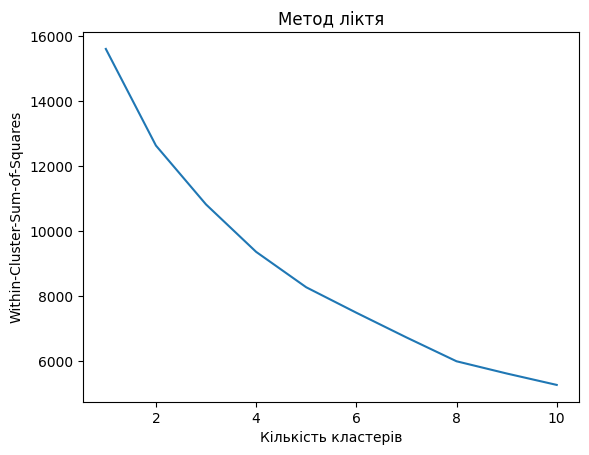

Оптимальна кількість кластерів: 1


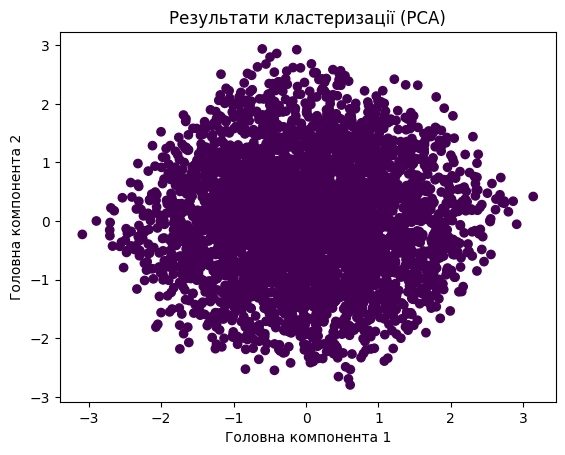

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Завантаження даних
file_path = "/content/shopping_trends.csv"
data = pd.read_csv(file_path)

# Вибір числових стовпців та перейменування
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
data = data[selected_columns]
data.columns = [col.lower().replace(" ", "_") for col in data.columns]

# Масштабування даних
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Визначення оптимальної кількості кластерів за допомогою методу ліктя
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Побудова графіка
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

# Вибір оптимальної кількості кластерів (ліктьова точка)
optimal_k = np.argmin(np.diff(wcss)) + 1
print(f"Оптимальна кількість кластерів: {optimal_k}")

# Кластеризація за допомогою K-means з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Додавання міток кластерів до даних
data['Cluster'] = cluster_labels

# Візуалізація результатів за допомогою PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Результати кластеризації (PCA)')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()
